# Will Your Career Survive AI by 2030?

## 🔗 Interactive Version

Try the live dashboard here:
https://aiimpact2030-j7fwx2xxgobqtym8s5gmk4.streamlit.app/


## Introduction

Artificial intelligence is already transforming industries worldwide.

But one question remains:

**Will your career survive the AI revolution?**

This project analyzes 3,000 job profiles to evaluate automation probability, salary stability, experience influence, and technological growth trends to understand which careers are most vulnerable and which are most resilient by 2030.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

df = pd.read_csv("AI_Impact_on_Jobs_2030.csv")

df.head()


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


## Dataset Overview

The dataset contains 3,000 job profiles with:

- Average Salary  
- Years of Experience  
- AI Exposure Index  
- Tech Growth Factor  
- Automation Probability (2030)  
- Skill intensity indicators


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## The Automation Shock


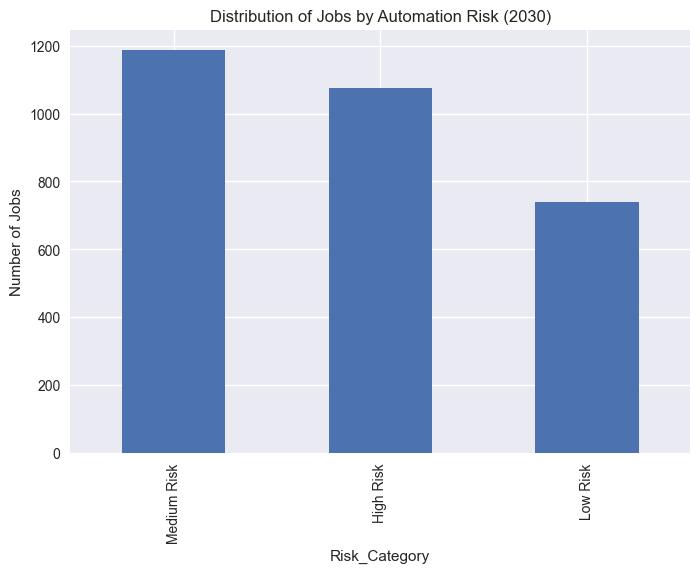

In [4]:
df["Risk_Category"] = pd.cut(
    df["Automation_Probability_2030"],
    bins=[0, 0.3, 0.6, 1],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

df["Risk_Category"].value_counts().plot(kind="bar")
plt.title("Distribution of Jobs by Automation Risk (2030)")
plt.ylabel("Number of Jobs")
plt.show()


In [5]:
high_risk_percentage = (
    (df["Automation_Probability_2030"] > 0.6).mean() * 100
).round(1)

high_risk_percentage


np.float64(35.8)

More than **35.8%** of job profiles face automation probabilities above 60% by 2030.
.

Automation risk is not isolated it is widespread across the workforce.


## Does Higher Income Really Guarantee Safety?


C:\Users\owner\AppData\Local\Temp\ipykernel_40644\2707386731.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Risk_Category")["Average_Salary"].mean().plot(kind="bar")


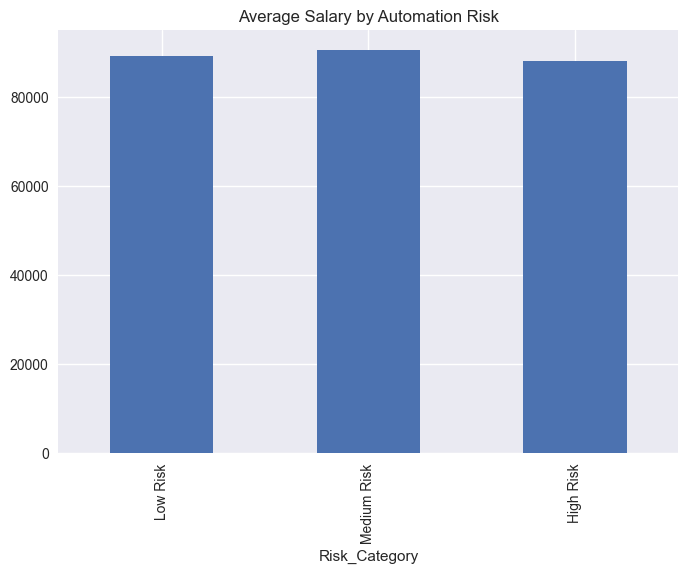

In [6]:
df.groupby("Risk_Category")["Average_Salary"].mean().plot(kind="bar")
plt.title("Average Salary by Automation Risk")
plt.show()


## Does Experience Protect Workers from AI?


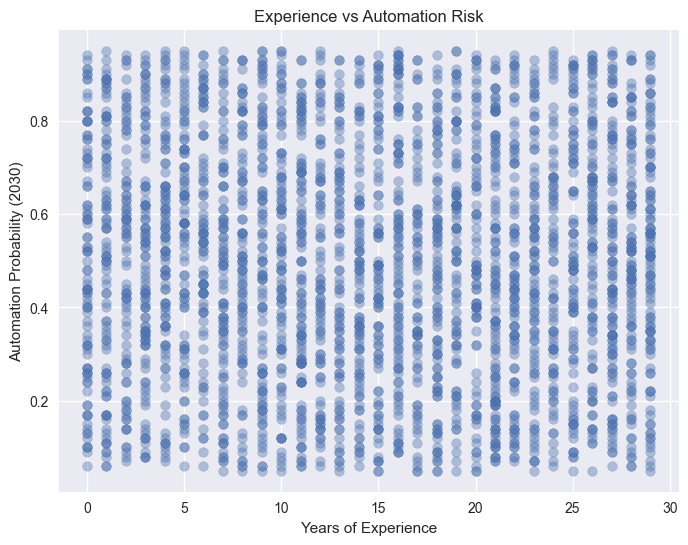

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["Years_Experience"],
    df["Automation_Probability_2030"],
    alpha=0.4
)
plt.title("Experience vs Automation Risk")
plt.xlabel("Years of Experience")
plt.ylabel("Automation Probability (2030)")
plt.show()


## Growth vs Risk: Is There a Tradeoff?


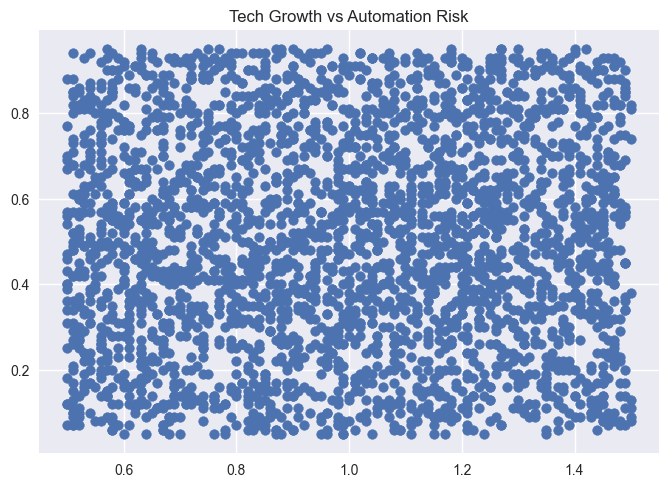

In [8]:
plt.scatter(df["Tech_Growth_Factor"], df["Automation_Probability_2030"])
plt.title("Tech Growth vs Automation Risk")
plt.show()


## Future Stability Score


In [9]:
df["Future_Stability_Score"] = (
    (1 - df["Automation_Probability_2030"]) * 0.6 + df["Tech_Growth_Factor"] * 0.4
)

df.sort_values("Future_Stability_Score", ascending=False).head(10)


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Future_Stability_Score
1561,Teacher,104713,13,High School,0.70,1.49,0.07,Low Risk,0.43,0.24,0.63,0.81,0.97,0.45,0.79,0.92,0.68,0.24,1.154
1936,Nurse,95478,22,High School,0.60,1.50,0.08,Low Risk,0.42,0.78,0.03,0.69,0.08,0.24,0.16,0.91,0.18,0.04,1.152
1415,Nurse,106831,23,Master's,0.32,1.48,0.07,Low Risk,0.26,0.09,0.27,0.09,0.51,0.44,0.17,0.17,0.63,0.39,1.150
451,Nurse,111335,0,Master's,0.27,1.50,0.09,Low Risk,0.01,0.15,0.78,0.45,0.45,0.96,0.92,0.31,0.21,0.85,1.146
1768,AI Engineer,148283,25,Bachelor's,0.37,1.48,0.08,Low Risk,0.56,0.01,0.71,0.20,0.13,0.34,0.77,0.11,0.23,0.01,1.144
2542,Doctor,94407,11,PhD,0.13,1.46,0.07,Low Risk,0.50,0.92,0.61,0.50,0.74,0.35,0.19,0.85,0.06,0.81,1.142
2116,Nurse,148871,17,High School,0.62,1.47,0.08,Low Risk,0.51,0.05,0.32,0.62,0.84,0.73,0.46,0.91,0.30,0.75,1.140
539,Nurse,84304,0,Bachelor's,0.44,1.44,0.06,Low Risk,0.85,1.00,0.89,0.81,0.37,0.23,0.73,0.30,0.18,0.79,1.140
1107,Doctor,71986,2,PhD,0.66,1.46,0.08,Low Risk,0.48,0.05,0.50,0.25,0.91,0.40,0.63,0.86,0.98,0.50,1.136
565,Doctor,62975,1,Master's,0.88,1.50,0.11,Low Risk,0.76,0.59,0.26,0.98,0.90,0.13,0.03,0.69,0.60,0.94,1.134


Profiles with high stability scores combine low automation risk with strong growth potential.

These represent the most resilient career paths toward 2030.


## What This Means for Individuals

Automation risk does not selectively target low-income or junior roles.

The data suggests that career resilience depends less on tenure and more on adaptability, technological alignment, and continuous skill evolution.


## Final Insight

Automation is not coming for specific people it is coming for specific patterns of work.

By 2030, survival will depend less on avoiding AI and more on learning to collaborate with it.

The future will reward adaptability.
